---

# Ioannou_Georgios


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center">Logistic Regression On The Titanic Dataset</h1>

<h2 align="center"><i style="color:red">Tensorflow</i> and <i style="color:red">Pytorch</i></h2>

<details>
  <summary>Table of Contents</summary>
  <ol>
    <li>Titanic Dataset</li>
    <li>Libraries</li>
    <li>
      Tensorflow
      <ul>
        <li>Inspect and Explore Data</li>
        <li>Select and Engineer Features</li>
        <li>Build Train Evaluate Model In Tensorflow <i style="color:red">Functional API</i></li>
        <li>Build Train Evaluate Model In Tensorflow <i style="color:red">Sequential API</i></li>
      </ul>
    </li>
    <li>
      Pytorch
      <ul>
        <li>Inspect and Explore Data</li>
        <li>Select and Engineer Features</li>
        <li>Build and Train Model</li>
        <li>Evaluate Model</li>
      </ul>
    </li>
  </ol>
</details>


---

## **Titanic Dataset**


### The Titanic dataset is a well-known dataset in the field of machine learning and data science. It contains information about the passengers aboard the RMS Titanic, which famously sank on its maiden voyage in April 1912 after hitting an iceberg. This dataset is often used for educational and introductory purposes in data analysis and predictive modeling. Here's a typical description of the Titanic dataset:

- ##### **_Dataset Contents:_** The Titanic dataset contains the following information for each passenger (NOTE:there are null/duplicate values):

  1. **Passenger ID:** A unique identifier for each passenger.
  2. **Survived:** A binary variable indicating whether the passenger survived or not. It is often coded as 1 for survived and 0 for did not survive.
  3. **Pclass:** The passenger's class or ticket class, representing their socio-economic status. It can take values 1 (first class), 2 (second class), or 3 (third class).
  4. **Name:** The passenger's name.
  5. **Sex:** The passenger's gender, either "male" or "female."
  6. **Age:** The passenger's age in years.
  7. **SibSp:** The number of siblings or spouses the passenger had aboard the Titanic.
  8. **Parch:** The number of parents or children the passenger had aboard the Titanic.
  9. **Ticket:** The ticket number.
  10. **Fare:** The fare paid by the passenger.
  11. **Cabin:** The cabin number where the passenger stayed (if available).
  12. **Embarked:** The port of embarkation, which can take values C (Cherbourg), Q (Queenstown), or S (Southampton).

- #### **_Number of Rows:_** **891**
- #### **_Number of Columns:_** **12**
- ##### **_Purpose:_** The Titanic dataset is commonly used for predictive modeling and data analysis tasks. Mainly used for binary classification problems such as predicting whether a passenger **survived** or **not** based on the available features. It serves as a beginner-friendly dataset to practice data preprocessing, feature engineering, and building machine learning models.


---

## **Libraries**


In [1]:
# Import libraries.


import matplotlib.pyplot as plt # Data visualization.
%matplotlib inline
import numpy as np              # numpy for data handling/wrangling.
import pandas as pd             # pandas for data handling/wrangling.
import seaborn as sns           # Data visualization.
sns.set()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Metrics
from sklearn.model_selection import train_test_split # To split data in training/validating/testing
from sklearn.preprocessing import StandardScaler     # To perform standardization by centering and scaling.


---

<h1 align="center"> Main Code </h1>


## **Tensorflow**


In [2]:
import tensorflow as tf  # Tensorflow.
from tensorflow import keras  # Keras API.

### **_Inspect and Explore Data_**


In [3]:
# Load data
df = pd.read_csv("./titanic.csv")

# Display data
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 1. Shape and size.

print(df.shape)

(891, 12)


In [5]:
# 2. Describe.

df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 3. Get info on columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Inspect / check for nulls.

df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [8]:
# Percentage of null values per columns.

((df.isnull().sum() / len(df)) * 100).round(2)

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
dtype: float64

In [9]:
# Check for duplicates.

n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


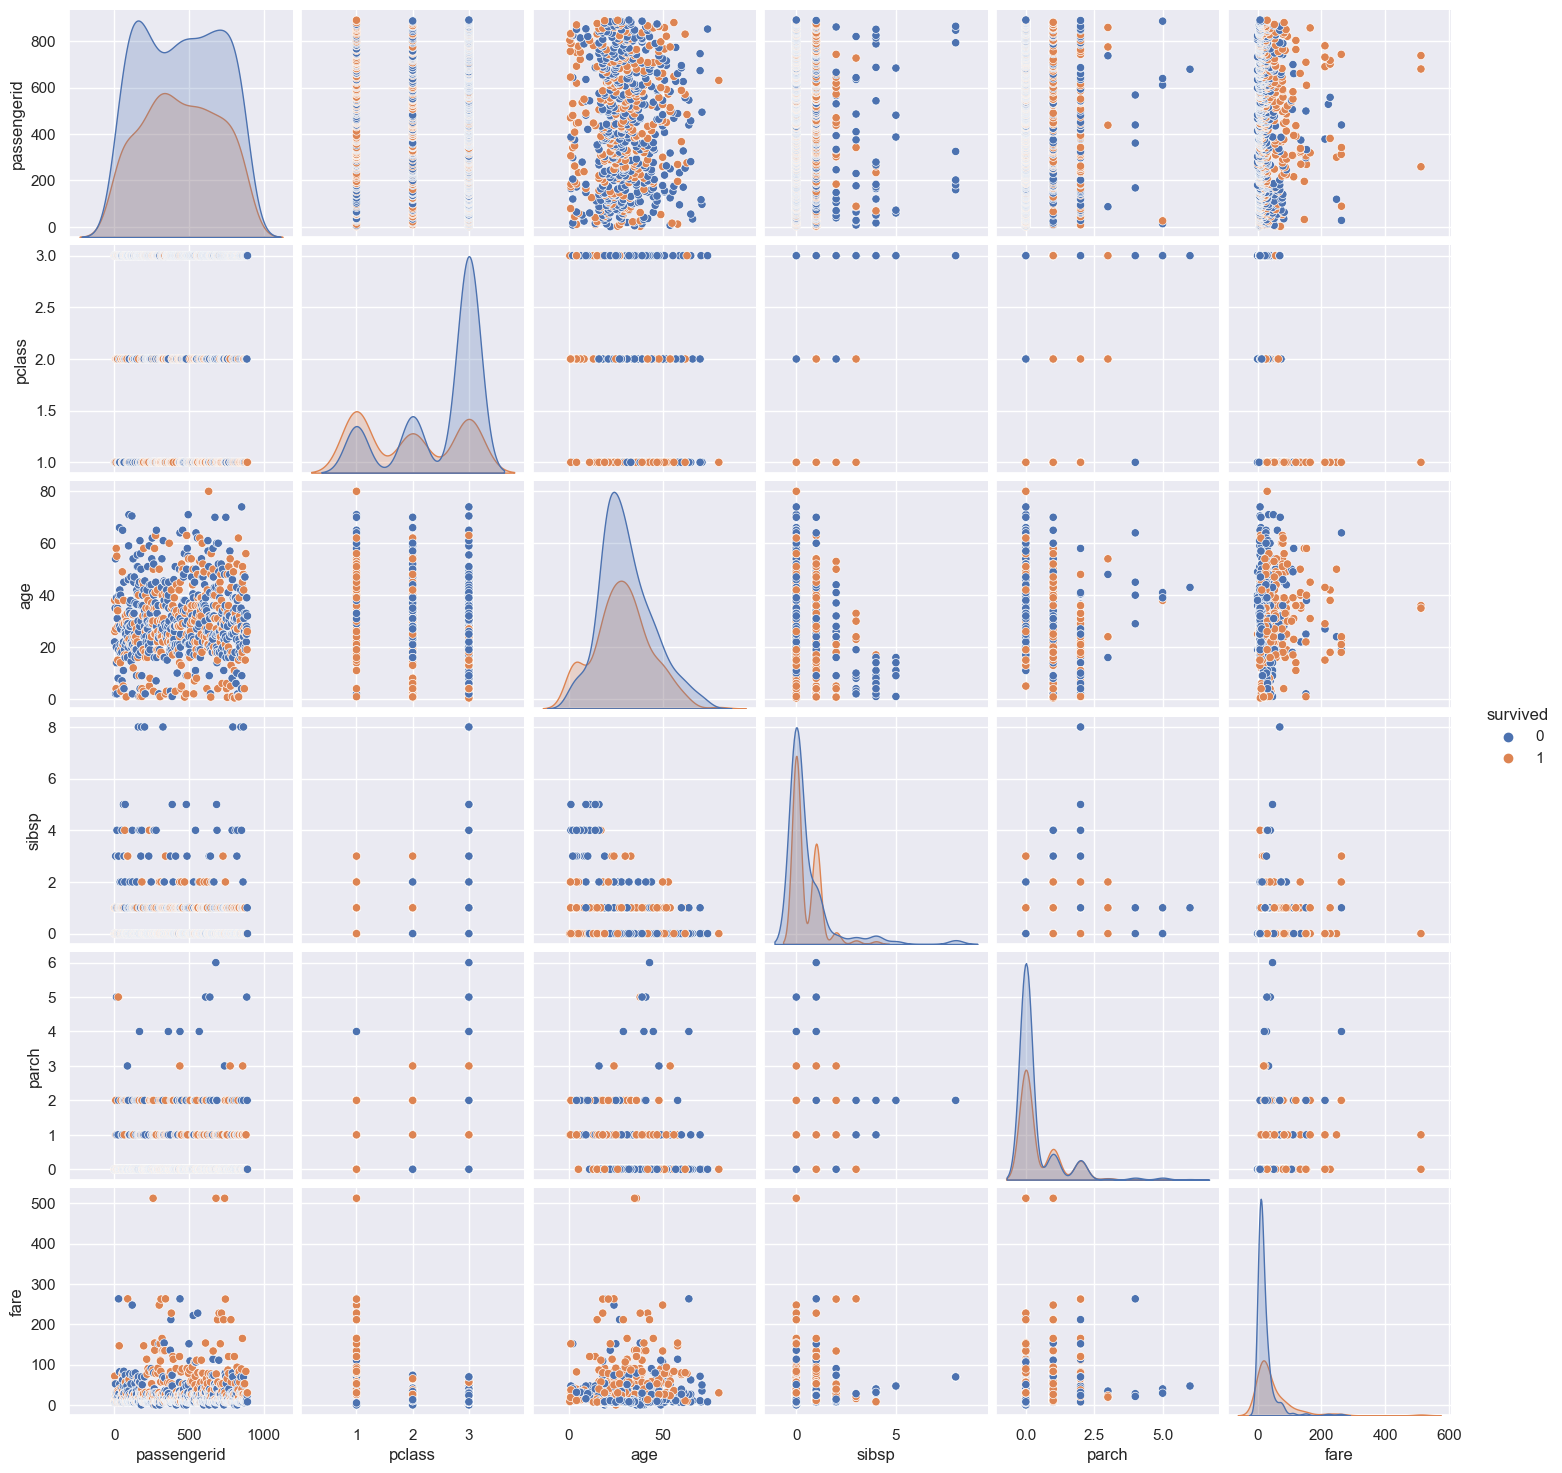

In [10]:
sns.pairplot(df, hue="survived")

C:\Users\georg\AppData\Local\Temp\ipykernel_16820\2861667174.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="age", hue="survived", shade=True)


<Axes: xlabel='age', ylabel='Density'>

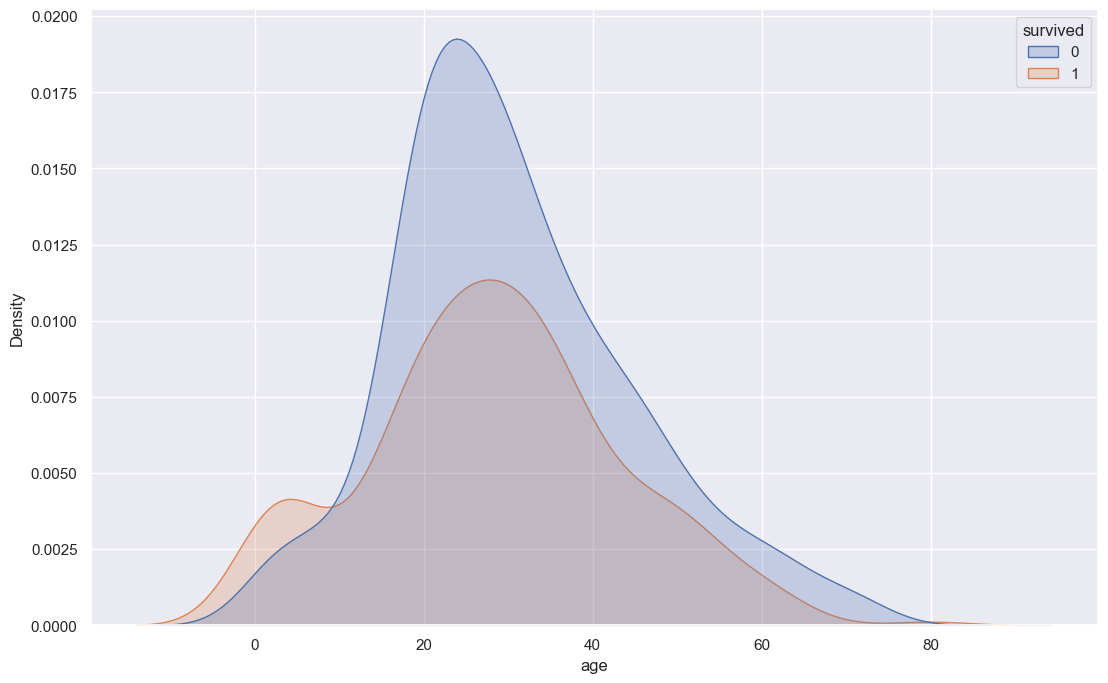

In [11]:
plt.figure(figsize=(13, 8))
sns.kdeplot(data=df, x="age", hue="survived", shade=True)

In [12]:
df.groupby("sex")["survived"].sum() / df.groupby("sex")["survived"].count()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

### **_Select and Engineer Features_**


In [13]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [15]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [16]:
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,True,True,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,True,False,False


In [19]:
df = pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True,False,True


In [20]:
# selected_features = ["fare", "pclass_2", "pclass_3", "sex_male"]


# TO INCLUDE AGE:
#
# 1.
# df.dropna(subset=['age'], inplace=True)
# selected_features = ["age", "fare", "pclass_2", "pclass_3", "sex_male"]
#
# 2.
mean_age = df["age"].mean()  # OR median_age = df['age'].median()
df["age"].fillna(
    mean_age, inplace=True
)  # OR df['age'].fillna(median_age, inplace=True)
selected_features = ["age", "fare", "pclass_2", "pclass_3", "sex_male"]

In [21]:
X = df[selected_features]

y = df["survived"]

In [22]:
# May also split into training, testing, and validation. Then, you can report the validation accuracy and validation loss during the training.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(
    "Lenght of our Training data:",
    X_train.shape,
    "\nLength of our Testing data:",
    X_test.shape,
)

Lenght of our Training data: (712, 5) 
Length of our Testing data: (179, 5)


In [23]:
y_train = y_train.to_frame(name="Survived")
y_test = y_test.to_frame(name="Survived")

In [24]:
# Convert pandas DataFrames to NumPy arrays.

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

### **_Build Train Evaluate Model In Tensorflow Functional API_**


In [25]:
# Define the LogisticRegressionTensorFlow model using the Tensorflow Functional API.


class LogisticRegressionTensorFlow(tf.keras.Model):
    def __init__(self, input_dim):
        super(LogisticRegressionTensorFlow, self).__init__()
        self.fc1 = tf.keras.layers.Dense(input_dim * 2, activation="relu")
        self.fc2 = tf.keras.layers.Dense(input_dim * 4, activation="relu")
        self.fc3 = tf.keras.layers.Dense(1, activation="sigmoid")

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [26]:
# Create an instance of the LogisticRegressionTensorFlow class model.

model = LogisticRegressionTensorFlow(input_dim=X_train.shape[1])

print(model)

In [27]:
# Perform a forward pass with some data to initialize the model's weights by using a single example from X_train.

sample_input = tf.constant(X_train[:1])
_ = model(sample_input)

print(model.summary())

Model: "logistic_regression_tensor_flow"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  60        
                                                                 
 dense_1 (Dense)             multiple                  220       
                                                                 
 dense_2 (Dense)             multiple                  21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Loss function.

criterion = tf.keras.losses.BinaryCrossentropy()

# Optimizer.

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [29]:
# Training loop.

num_epochs = 5000

for epoch in range(num_epochs):
    # Forward pass.

    with tf.GradientTape() as tape:
        outputs = model(X_train)
        loss = criterion(y_train, outputs)

    # Calculate gradients and update weights.

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.numpy():.4f}")

Epoch [100/5000], Loss: 0.6079
Epoch [200/5000], Loss: 0.5753
Epoch [300/5000], Loss: 0.5210
Epoch [400/5000], Loss: 0.4846
Epoch [500/5000], Loss: 0.4717
Epoch [600/5000], Loss: 0.4649
Epoch [700/5000], Loss: 0.4613
Epoch [800/5000], Loss: 0.4590
Epoch [900/5000], Loss: 0.4569
Epoch [1000/5000], Loss: 0.4554
Epoch [1100/5000], Loss: 0.4541
Epoch [1200/5000], Loss: 0.4530
Epoch [1300/5000], Loss: 0.4521
Epoch [1400/5000], Loss: 0.4504
Epoch [1500/5000], Loss: 0.4471
Epoch [1600/5000], Loss: 0.4420
Epoch [1700/5000], Loss: 0.4333
Epoch [1800/5000], Loss: 0.4254
Epoch [1900/5000], Loss: 0.4197
Epoch [2000/5000], Loss: 0.4161
Epoch [2100/5000], Loss: 0.4136
Epoch [2200/5000], Loss: 0.4120
Epoch [2300/5000], Loss: 0.4109
Epoch [2400/5000], Loss: 0.4101
Epoch [2500/5000], Loss: 0.4091
Epoch [2600/5000], Loss: 0.4083
Epoch [2700/5000], Loss: 0.4078
Epoch [2800/5000], Loss: 0.4073
Epoch [2900/5000], Loss: 0.4069
Epoch [3000/5000], Loss: 0.4066
Epoch [3100/5000], Loss: 0.4063
Epoch [3200/5000]

In [30]:
# Put the model in evaluation state.

model.compile(optimizer=optimizer, loss=criterion, metrics=["accuracy"])

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(np.float32)

6/6 [==============================] - 0s 1ms/step


In [31]:
# Calculate evaluation metrics.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy Score On The Test Set: {accuracy:.2%}")
print(f"Precision Score On The Test Set: {precision:.2%}")
print(f"Recall Score On The Test Set: {recall:.2%}")
print(f"F1 Score On The Test Set: {f1:.2%}")

Accuracy Score On The Test Set: 83.80%
Precision Score On The Test Set: 75.51%
Recall Score On The Test Set: 68.52%
F1 Score On The Test Set: 71.84%


Text(67.25, 0.5, 'Actual')

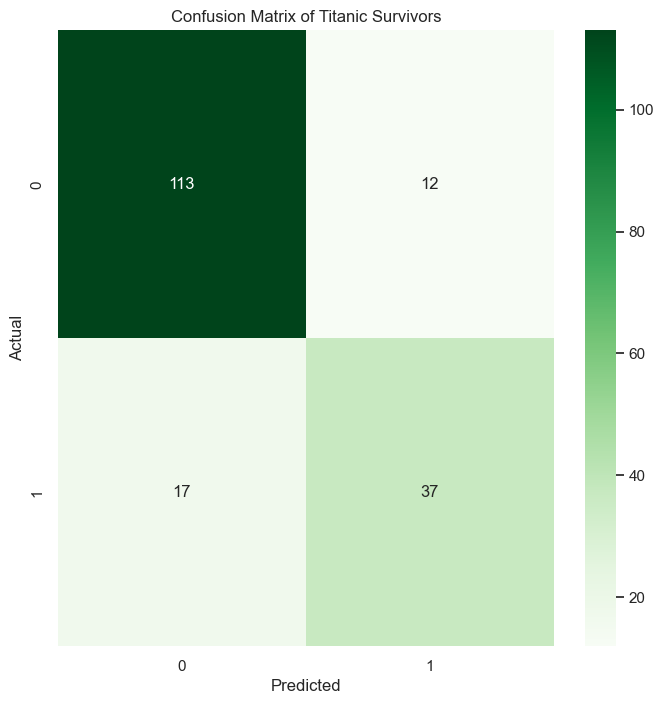

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

tn, fp, fn, tp = cm.ravel()

fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")

plt.title("Confusion Matrix of Titanic Survivors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
survive_classes = ["Not Survived", "Survived"]

In [34]:
print(
    "Model Classification Report\n",
    classification_report(y_test, y_pred, target_names=survive_classes),
)

Model Classification Report
               precision    recall  f1-score   support

Not Survived       0.87      0.90      0.89       125
    Survived       0.76      0.69      0.72        54

    accuracy                           0.84       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.83      0.84      0.84       179



### **_Build Train Evaluate Model In Tensorflow Sequential API_**


In [35]:
# Define the LogisticRegressionTensorFlow model using the Tensorflow Sequential API.

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            X_train.shape[1] * 2, activation="relu", input_shape=(X_train.shape[1],)
        ),
        tf.keras.layers.Dense(X_train.shape[1] * 4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [36]:
# Print model summary.

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Loss function.

criterion = tf.keras.losses.BinaryCrossentropy()

# Optimizer.

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [38]:
# Compile the model.

model.compile(optimizer=optimizer, loss=criterion, metrics=["accuracy"])

In [39]:
# Training loop.

num_epochs = 5000

for epoch in range(num_epochs):
    # Forward pass and training step.

    history = model.fit(X_train, y_train, epochs=1, verbose=0)

    if (epoch + 1) % 100 == 0:
        print(
            f"Epoch [{epoch + 1}/{num_epochs}], Loss: {history.history['loss'][0]:.4f}"
        )

Epoch [100/5000], Loss: 0.4561
Epoch [200/5000], Loss: 0.4438
Epoch [300/5000], Loss: 0.4147
Epoch [400/5000], Loss: 0.4128
Epoch [500/5000], Loss: 0.4010
Epoch [600/5000], Loss: 0.4044
Epoch [700/5000], Loss: 0.3989
Epoch [800/5000], Loss: 0.3972
Epoch [900/5000], Loss: 0.3941
Epoch [1000/5000], Loss: 0.3920
Epoch [1100/5000], Loss: 0.4019
Epoch [1200/5000], Loss: 0.3865
Epoch [1300/5000], Loss: 0.3808
Epoch [1400/5000], Loss: 0.3851
Epoch [1500/5000], Loss: 0.3808
Epoch [1600/5000], Loss: 0.3876
Epoch [1700/5000], Loss: 0.3868
Epoch [1800/5000], Loss: 0.3794
Epoch [1900/5000], Loss: 0.3765
Epoch [2000/5000], Loss: 0.3849
Epoch [2100/5000], Loss: 0.3823
Epoch [2200/5000], Loss: 0.3720
Epoch [2300/5000], Loss: 0.3811
Epoch [2400/5000], Loss: 0.3994
Epoch [2500/5000], Loss: 0.3738
Epoch [2600/5000], Loss: 0.3906
Epoch [2700/5000], Loss: 0.3790
Epoch [2800/5000], Loss: 0.3740
Epoch [2900/5000], Loss: 0.3711
Epoch [3000/5000], Loss: 0.3858
Epoch [3100/5000], Loss: 0.3751
Epoch [3200/5000]

In [40]:
# Put the model in evaluation state.

model.evaluate(X_test, y_test)


# Make predictions.

y_pred = (model.predict(X_test) >= 0.5).astype(int)

6/6 [==============================] - 0s 4ms/step


In [41]:
# Calculate evaluation metrics.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy Score On The Test Set: {accuracy:.2%}")
print(f"Precision Score On The Test Set: {precision:.2%}")
print(f"Recall Score On The Test Set: {recall:.2%}")
print(f"F1 Score On The Test Set: {f1:.2%}")

Accuracy Score On The Test Set: 82.12%
Precision Score On The Test Set: 72.00%
Recall Score On The Test Set: 66.67%
F1 Score On The Test Set: 69.23%


Text(67.25, 0.5, 'Actual')

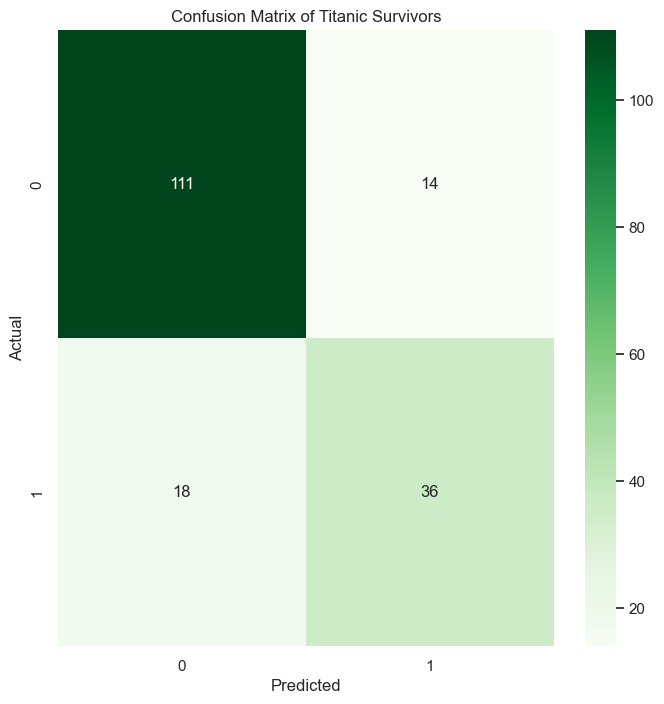

In [42]:
# Calculate and display the confusion matrix.

cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

tn, fp, fn, tp = cm.ravel()

fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")

plt.title("Confusion Matrix of Titanic Survivors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [43]:
survive_classes = ["Not Survived", "Survived"]

In [44]:
print(
    "Model Classification Report\n",
    classification_report(y_test, y_pred, target_names=survive_classes),
)

Model Classification Report
               precision    recall  f1-score   support

Not Survived       0.86      0.89      0.87       125
    Survived       0.72      0.67      0.69        54

    accuracy                           0.82       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.82      0.82      0.82       179



## **Pytorch**


In [45]:
import torch  # PyTorch.
import torch.nn as nn  # Neural network module from PyTorch.
import torch.optim as optim  # Optimization module from PyTorch.

### **_Inspect and Explore Data_**


In [46]:
# Load the data.

df = pd.read_csv("./titanic.csv")

# Display the data.

df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# 1. Shape and size.

print(df.shape)

(891, 12)


In [48]:
# 2. Describe.

df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# 3. Get info on columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
# Inspect / check for nulls.

df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [51]:
# Percentage of null values per columns.

((df.isnull().sum() / len(df)) * 100).round(2)

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
dtype: float64

In [52]:
# Check for duplicates.

n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


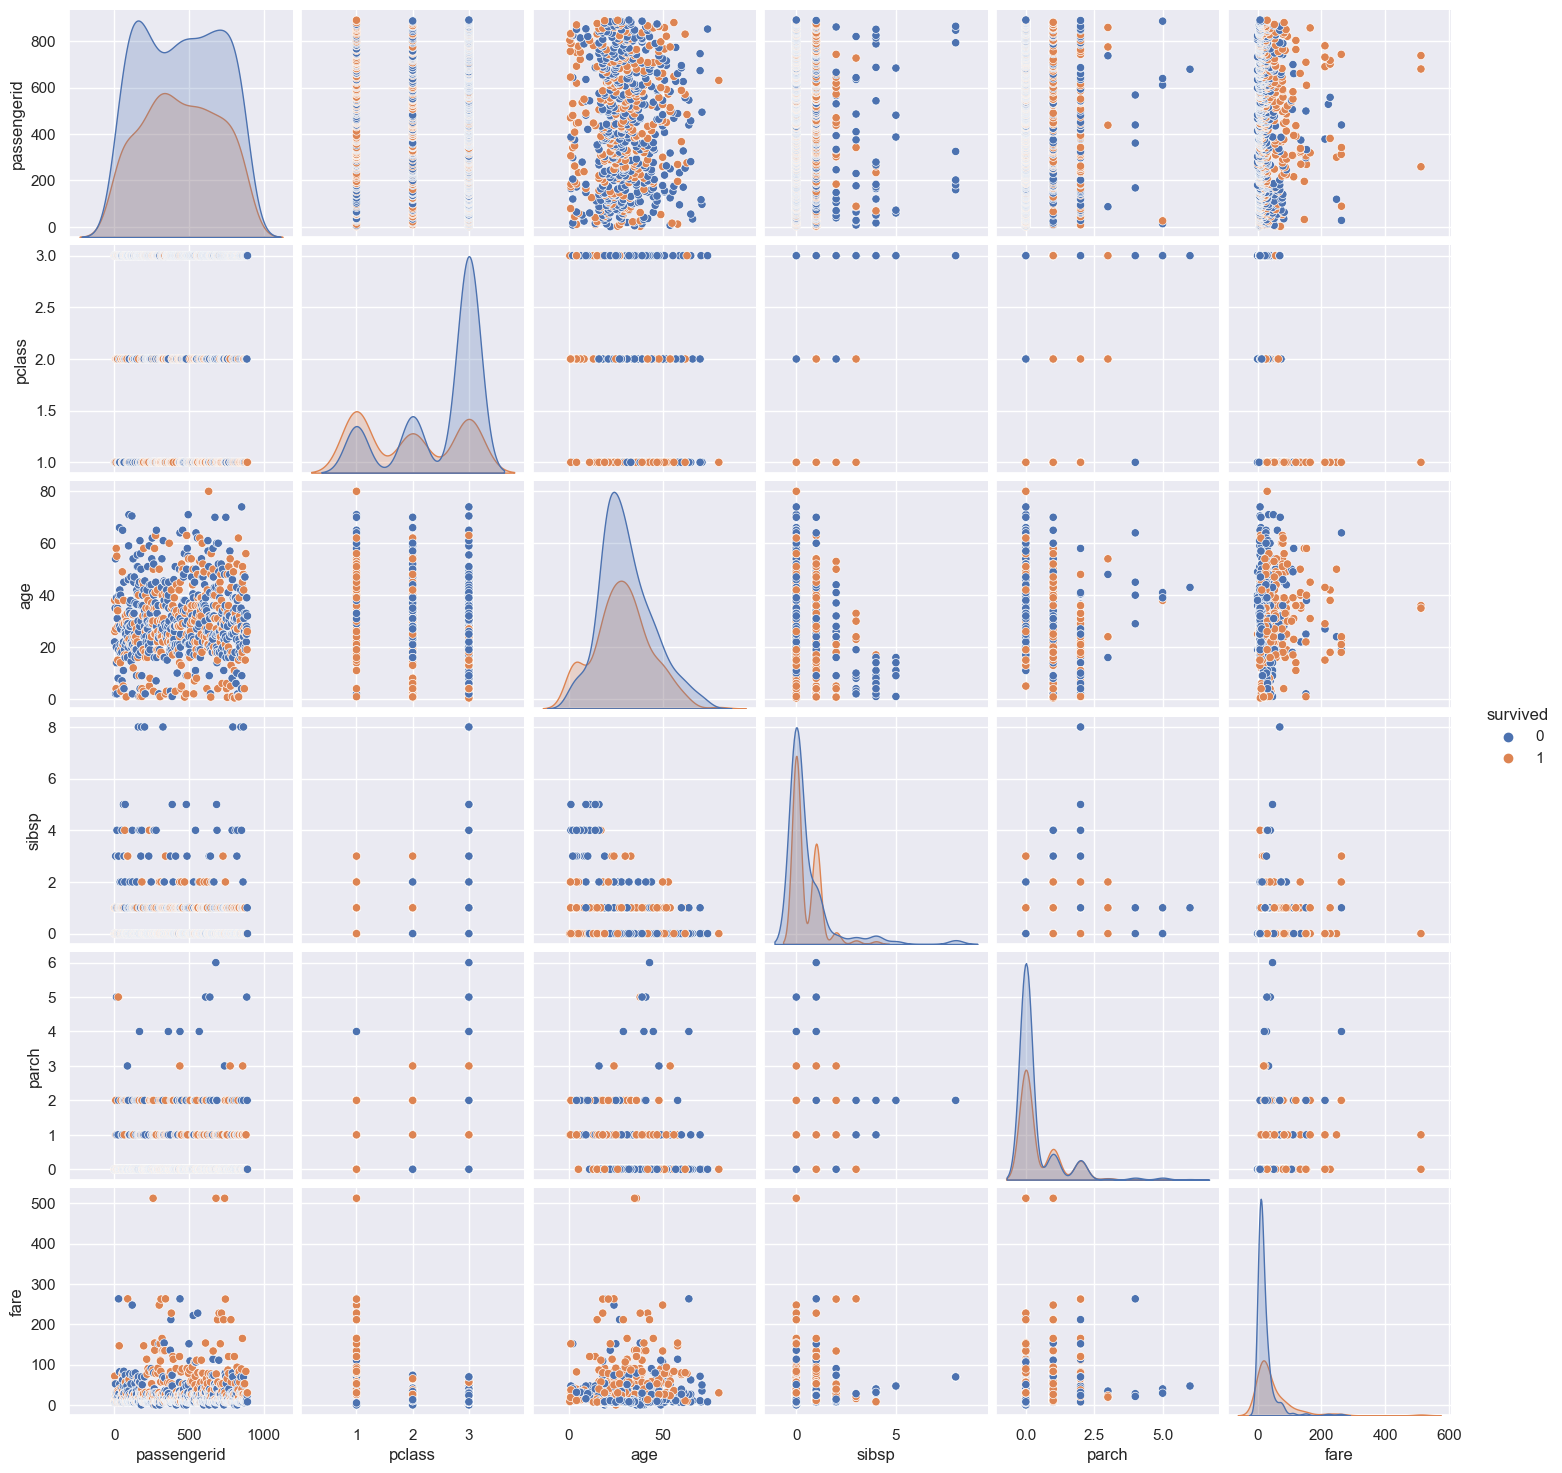

In [53]:
sns.pairplot(df, hue="survived")

C:\Users\georg\AppData\Local\Temp\ipykernel_16820\2861667174.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="age", hue="survived", shade=True)


<Axes: xlabel='age', ylabel='Density'>

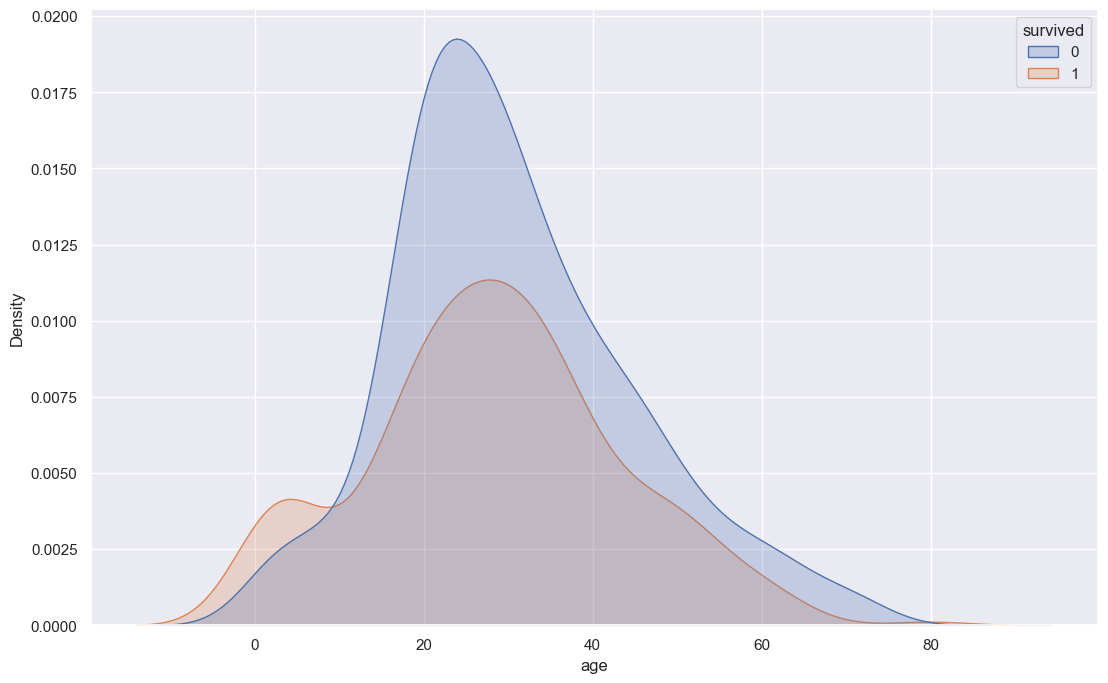

In [54]:
plt.figure(figsize=(13, 8))
sns.kdeplot(data=df, x="age", hue="survived", shade=True)

In [55]:
df.groupby("sex")["survived"].sum() / df.groupby("sex")["survived"].count()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

### **_Select and Engineer Features_**


In [56]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [58]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [59]:
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [60]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,True,True,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,True,False,False


In [62]:
df = pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True,False,True


In [63]:
# selected_features = ["fare", "pclass_2", "pclass_3", "sex_male"]


# TO INCLUDE AGE:
#
# 1.
# df.dropna(subset=['age'], inplace=True)
# selected_features = ["age", "fare", "pclass_2", "pclass_3", "sex_male"]
#
# 2.
mean_age = df["age"].mean()  # OR median_age = df['age'].median()
df["age"].fillna(
    mean_age, inplace=True
)  # OR df['age'].fillna(median_age, inplace=True)
selected_features = ["age", "fare", "pclass_2", "pclass_3", "sex_male"]

In [64]:
X = df[selected_features]

y = df["survived"]

In [65]:
# May also split into training, testing, and validation. Then, you can report the validation accuracy and validation loss during the training.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(
    "Lenght of our Training data:",
    X_train.shape,
    "\nLength of our Testing data:",
    X_test.shape,
)

Lenght of our Training data: (712, 5) 
Length of our Testing data: (179, 5)


In [66]:
y_train = y_train.to_frame(name="Survived")
y_test = y_test.to_frame(name="Survived")

In [67]:
# Convert pandas DataFrames to NumPy arrays.

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [68]:
# Create PyTorch tensors from NumPy arrays.

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="Build, Train, and Evaluate a Model in Pytorch"/>


### **_Build and Train Model_**


In [69]:
# Define the LogisticRegressionPytorch model.


class LogisticRegressionPytorch(nn.Module):
    def __init__(self):
        super(LogisticRegressionPytorch, self).__init__()
        self.fc1 = nn.Linear(
            in_features=X_train.shape[1], out_features=X_train.shape[1] * 2
        )
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(
            in_features=X_train.shape[1] * 2, out_features=X_train.shape[1] * 4
        )
        self.relu = nn.ReLU()

        self.fc3 = nn.Linear(in_features=X_train.shape[1] * 4, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [84]:
# Create an instance of the LogisticRegressionPytorch class model.

model = LogisticRegressionPytorch()

print(model)

LogisticRegressionPytorch(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [85]:
# Loss function.

criterion = nn.BCELoss()

# Optimizer.

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [86]:
# Training loop.


num_epochs = 5000

for epoch in range(num_epochs):
    # Put the model in a train state.

    model.train()

    # Forward pass.

    outputs = model(X_train)

    # Calcualte loss.

    loss = criterion(outputs, y_train.view(-1, 1))

    # Optimize gradients.

    optimizer.zero_grad()

    # Backward propagation.

    loss.backward()

    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/5000], Loss: 0.6026
Epoch [200/5000], Loss: 0.5760
Epoch [300/5000], Loss: 0.5234
Epoch [400/5000], Loss: 0.4817
Epoch [500/5000], Loss: 0.4637
Epoch [600/5000], Loss: 0.4526
Epoch [700/5000], Loss: 0.4441
Epoch [800/5000], Loss: 0.4381
Epoch [900/5000], Loss: 0.4331
Epoch [1000/5000], Loss: 0.4268
Epoch [1100/5000], Loss: 0.4220
Epoch [1200/5000], Loss: 0.4176
Epoch [1300/5000], Loss: 0.4134
Epoch [1400/5000], Loss: 0.4099
Epoch [1500/5000], Loss: 0.4066
Epoch [1600/5000], Loss: 0.4030
Epoch [1700/5000], Loss: 0.3993
Epoch [1800/5000], Loss: 0.3962
Epoch [1900/5000], Loss: 0.3935
Epoch [2000/5000], Loss: 0.3911
Epoch [2100/5000], Loss: 0.3889
Epoch [2200/5000], Loss: 0.3869
Epoch [2300/5000], Loss: 0.3846
Epoch [2400/5000], Loss: 0.3825
Epoch [2500/5000], Loss: 0.3803
Epoch [2600/5000], Loss: 0.3784
Epoch [2700/5000], Loss: 0.3766
Epoch [2800/5000], Loss: 0.3751
Epoch [2900/5000], Loss: 0.3732
Epoch [3000/5000], Loss: 0.3712
Epoch [3100/5000], Loss: 0.3696
Epoch [3200/5000]

### **_Evaluate Model_**


In [87]:
# Put the model in evaluation state.

model.eval()

with torch.no_grad():  # We don't need gradients in the testing phase.
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()

    accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    precision = precision_score(y_test.numpy(), y_pred.numpy())
    recall = recall_score(y_test.numpy(), y_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_pred.numpy())

    print(f"Accuracy Score On The Test Set: {accuracy:.2%}")
    print(f"Precision Score On The Test Set: {precision:.2%}")
    print(f"Recall Score On The Test Set: {recall:.2%}")
    print(f"F1 Score On The Test Set: {f1:.2%}")

Accuracy Score On The Test Set: 82.12%
Precision Score On The Test Set: 77.05%
Recall Score On The Test Set: 72.31%
F1 Score On The Test Set: 74.60%


Text(67.25, 0.5, 'Actual')

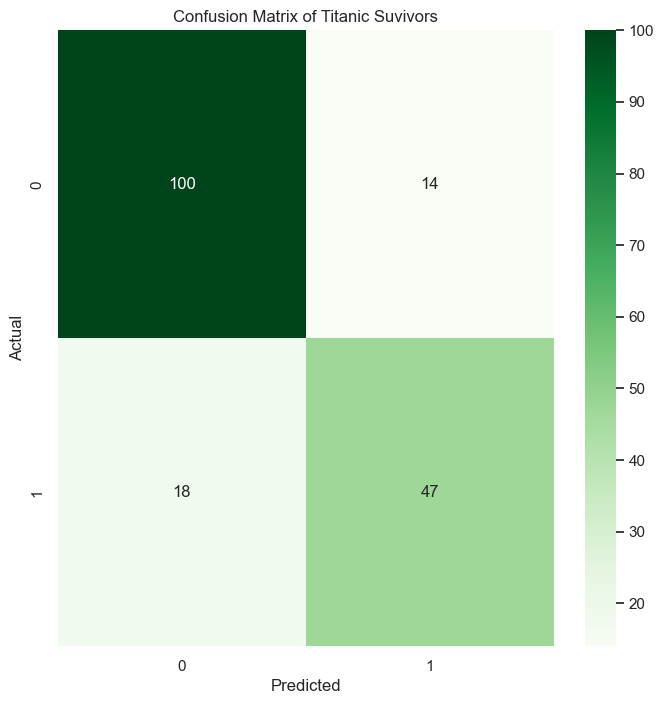

In [88]:
cm = confusion_matrix(y_test, y_pred)

cm = cm.round(2)

tn, fp, fn, tp = confusion_matrix(y_test.numpy(), y_pred.numpy()).ravel()

fig = plt.figure(figsize=(8, 8))

ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")

plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### **_Build Train Evaluate Model In Tensorflow Sequential API_**


In [89]:
survive_classes = ["Not Survived", "Survived"]

In [90]:
print(
    "Model Classification Report\n",
    classification_report(y_test.numpy(), y_pred.numpy(), target_names=survive_classes),
)

Model Classification Report
               precision    recall  f1-score   support

Not Survived       0.85      0.88      0.86       114
    Survived       0.77      0.72      0.75        65

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

